In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from scipy import ndimage
from scipy.ndimage import *
import cv2
import skimage.exposure

[[  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255 255]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255]]


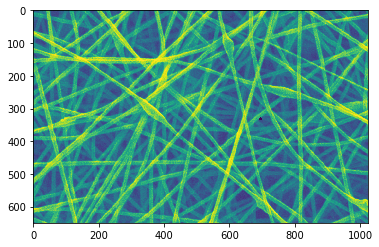

In [9]:
orig = cv2.imread("/home/marilin/Documents/ESP/data/SEM/EcN_II_PEO_131120_GML_15k_03.tif",0)[:650, :]

PATH_1 = cv2.imread("/home/marilin/Documents/ESP/diameterJ_test/sem_test/Segmented Images/EcN_II_PEO_131120_GML_15k_01_S1_reverse.tif",0)[:650, :]

# selecting a pixel that is bordering a black pixel
# make this px as the center of a 13x13 kernel - sanity check and for choosing the direction of the regression line


# choosing 1 white px - edges should be fixed 
# while 1:
#     rnd_idx = np.random.randint(1, (len(np.where(PATH_1 > 0)[0]))-1, 1)
#     x, y = np.where(PATH_1 > 0)[0][rnd_idx][0], np.where(PATH_1 > 0)[1][rnd_idx][0]
#     # neighboring px-s from white should be black (U+L, U+R / B+L, B+R) but majority of kernel should be white

#     # relative to px pos
 
#     U = PATH_1[x-1][y]
#     R = PATH_1[x][y+1]
#     L = PATH_1[x][y-1]
#     B = PATH_1[x+1][y]

#     # safe check 
#     if (U == 0 and L == 0) or (U == 0 and R == 0) or (B == 0 and L == 0) or (B == 0 and R == 0):
#         # kernel edge length
#         n = 13
#         #Creating a 13x13 kernel where x,y is the midpoint 
#         kernel_1 = PATH_1[x-(n//2):x+(n//2+1), y-(n//2):y+(n//2+1)]

#         if np.count_nonzero(kernel_1) > ((n**2) // 2):
#             break


# print(x,y)

# on the img reversed 
x,y = 332, 695

# distance transform
dist = cv2.distanceTransform(PATH_1, cv2.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
plt.imshow(cv2.cvtColor(dist, cv2.COLOR_BGR2RGB))
# how can i find perpendicularity from one px? (along on diag? - towards the direction of more whites? - if same, then look 
# at the general direction of whites?)
# 4 diagonals possible - the quarter with the most whites wins?


n = 13
# #Creating a 13x13 kernel where x,y is the midpoint 
kernel_1 = PATH_1[x-(n//2):x+(n//2+1), y-(n//2):y+(n//2+1)]
print(kernel_1)
# # find biggest sum
# UL = np.sum(kernel_1[:n//2, :n//2])
# UR = np.sum(kernel_1[:n//2:, n//2+1:])
# LL = np.sum(kernel_1[n//2+1:, :n//2])
# LR = np.sum(kernel_1[n//2+1:, n//2+1:])

#print(np.argmax(np.array([UL, UR, LL, LR])))

# 4th quarter - np.diag



# px distance in diagonals 



orig = cv2.circle(orig, (y,x), radius=4, color=(0, 0, 255), thickness=-1)
#print(np.count_nonzero(PATH_1))
#cv2.imshow("direction", theta)
plt.imshow(PATH_1)
plt.imshow(orig)